In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('Financial Distress.csv')


About H2O

Machine Learning PLatform used in here is H2O, which is a Fast, Scalable, Open source application for machine/deep learning. Big names such as PayPal, Booking.com, Cisco are using H2O as the ML platform. The speciality of h2o is that it is using in-memory compression to handles billions of data rows in memory, even in a small cluster. It is easy to use APIs with R, Python, Scala, Java, JSON as well as a built in web interface, Flow You can find more information here: https://www.h2o.ai


In [4]:
    import h2o
    from IPython import get_ipython
    import jupyter
    import matplotlib.pyplot as plt
    from pylab import rcParams
    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    import os
    from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

    h2o.init(max_mem_size = 2) # initializing h2o server
    h2o.remove_all()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/h2o/backend/connection.py:317: UserWarning: Proxy is defined in the environment: http_proxy. This may interfere with your H2O Connection.
  "This may interfere with your H2O Connection." % name)


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_191"; OpenJDK Runtime Environment (build 1.8.0_191-8u191-b12-2ubuntu0.16.04.1-b12); OpenJDK 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /home/nbuser/anaconda3_501/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_6xaybi5
  JVM stdout: /tmp/tmp_6xaybi5/h2o_nbuser_started_from_python.out
  JVM stderr: /tmp/tmp_6xaybi5/h2o_nbuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.4
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_nbuser_rpyd0s
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [5]:
data['Financial Distress'].value_counts()

0    3536
1     136
Name: Financial Distress, dtype: int64

### We can see the data is highly imbalanced about 3.7% of data is for company suffering from financial distress

In [6]:
    # Turns python pandas frame into an H2OFrame
    data_h20= h2o.H2OFrame(data)
    # check if there is any null values
    # creditData.isnull().sum() # pandas method
    data_h20.na_omit() # h2o method
    data_h20.nacnt() # no missing values found

Parse progress: |█████████████████████████████████████████████████████████| 100%


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [7]:
data_h20.head()

Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,Financial Distress
1,1,1.281,0.022934,0.87454,1.2164,0.06094,0.18827,0.5251,0.018854,0.18279,0.0064489,0.85822,2.0058,0.12546,6.9706,4.6512,0.0501,2.1984,0.018265,0.024978,0.027264,1.4173,9.5554,0.14872,0.66995,214.76,12.641,6.4607,0.043835,0.20459,0.35179,8.3161,0.28922,0.76606,2.5825,77.4,0.026722,1.6307,0.015016,0.0054783,0.1273,9.6951,-0.73622,0.98559,0.18016,1.5006,0.026224,7.0513,1174.9,5.3399,0.85128,12.837,0.061737,0.1809,209.87,-0.58255,0.47101,0.1099,0,0,0.22009,7.1241,15.381,3.2702,17.872,34.692,30.087,12.8,7991.4,364.95,15.8,61.476,4,36,85.437,27.07,26.102,16,16,0.2,22,0.06039,30,49,0
1,2,1.27,0.0064542,0.82067,1.0049,-0.01408,0.18104,0.62288,0.006423,0.035991,0.0017951,0.85152,-0.48644,0.17933,4.5764,3.7521,-0.014011,2.4575,0.027558,0.028804,0.041102,1.1801,7.2952,0.056026,0.67048,38.242,12.877,5.5506,0.26548,0.15019,0.41763,9.5276,0.41561,0.81699,2.6033,95.947,0.0075797,0.83754,0.027425,0.045434,0.13774,5.6035,-0.64385,1.3019,0.046857,1.0095,0.0078645,4.6022,1062.5,3.7389,0.94397,12.881,-0.00056494,0.056298,250.14,-0.47477,0.38599,0.36933,0,0,0,7.4166,7.105,14.321,18.77,124.76,26.124,11.8,8322.8,0.1896,15.6,24.579,0,36,107.09,31.31,30.194,17,16,0.4,22,0.010636,31,50,0
1,3,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.7654,-0.054324,0.89314,0.4122,0.077578,11.89,2.4884,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.06522,0.84827,-498.39,13.225,16.254,0.41657,0.074149,0.36723,9.3513,0.50356,0.91962,1.4931,144.67,-0.066483,0.95579,0.01727,0.028059,0.10242,9.4003,-14.032,0.75746,-0.57976,0.57832,-0.064373,11.988,651.15,10.934,0.93478,12.909,0.041625,0.047562,280.55,-1,0.48844,0.053299,0.0037854,0.0051907,0,3.6373,7.0213,1.1538,9.8951,6.4467,30.245,10.3,8747,11.946,15.2,20.7,0,35,120.87,36.07,35.273,17,15,-0.2,22,-0.45597,32,51,0
1,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.10791,-0.065316,0.89581,0.9949,0.14112,6.0862,1.6382,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.12516,0.80478,-75.867,13.305,8.895,0.083774,0.054098,0.5436,7.0909,0.67133,0.93701,2.3533,219.75,-0.017,0.38335,0.014327,0.20337,0.10143,5.7379,0.72205,1.3912,-0.15013,0.64508,-0.017731,6.1114,703.04,5.7028,0.87484,13.094,0.1084,0.10135,413.74,0.565,0.34408,0.073356,3.66e-05,4.53e-05,0,5.1442,9.9099,2.0408,-1.4903,-21.907,34.285,11.5,9042.5,-18.748,10.4,47.429,4,33,54.806,39.8,38.377,17.167,16,5.6,22,-0.32539,33,52,1
2,1,1.0623,0.10702,0.8146,0.83593,0.19996,0.0478,0.742,0.12803,0.57725,0.094075,0.81549,3.0147,0.1854,4.3938,1.6169,0.23921,3.0311,0.0068143,0.079346,0.0088763,1.0251,4.7463,0.26602,0.7677,1423.1,11.575,17.488,0.62077,0.046907,0.56963,9.4861,0.68143,0.94242,4.1296,222.65,0.13123,0.25301,0.0081518,0.35301,0.17612,4.5088,-0.11339,1.0527,0.60766,0.25782,0.13138,4.4151,2465.4,4.1408,0.73398,11.396,0.25031,0.22237,315.34,-0.060101,0.20242,1.2291,-0.002491,-0.00298,0.22688,7.1241,15.381,3.2702,17.872,34.692,30.087,12.8,7991.4,364.95,15.8,61.476,4,36,85.437,27.07,26.102,16,16,0.2,29,1.251,7,27,0
2,2,1.0558,0.081916,0.87949,0.68673,0.14263,0.043102,0.77198,0.11928,0.67973,0.063605,0.81574,2.3646,0.12051,7.2978,1.2609,0.20769,2.9089,0.012307,0.087834,0.015929,0.84185,3.8821,0.23988,0.77264,1748,12.048,15.933,0.60471,0.10685,0.59646,5.5914,0.86856,0.87851,3.8269,285.5,0.10042,0.8866,0.017922,0.31829,0.1769,5.6983,0.22828,0.68127,0.46308,0.35765,0.093141,7.3356,2571.6,6.4112,0.76012,11.672,0.22394,0.16473,412.79,0.10245,0.17945,0.61177,-0.011241,-0.016369,0.22445,7.4166,7.105,14.321,18.77,124.76,26.124,11.8,8322.8,0.1896,15.6,24.579,0,36,107.09,31.31,30.194,17,16,0.4,29,1.3573,8,28,0
2,3,0.97059,0.076064,0.90677,0.8098,0.16592,-0.024649,

### As company and time does not give enough explainabilty to business

In [8]:
features= data_h20.drop(['Company','Time'], axis=1)

In [9]:
features.head()

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,Financial Distress
1.281,0.022934,0.87454,1.2164,0.06094,0.18827,0.5251,0.018854,0.18279,0.0064489,0.85822,2.0058,0.12546,6.9706,4.6512,0.0501,2.1984,0.018265,0.024978,0.027264,1.4173,9.5554,0.14872,0.66995,214.76,12.641,6.4607,0.043835,0.20459,0.35179,8.3161,0.28922,0.76606,2.5825,77.4,0.026722,1.6307,0.015016,0.0054783,0.1273,9.6951,-0.73622,0.98559,0.18016,1.5006,0.026224,7.0513,1174.9,5.3399,0.85128,12.837,0.061737,0.1809,209.87,-0.58255,0.47101,0.1099,0,0,0.22009,7.1241,15.381,3.2702,17.872,34.692,30.087,12.8,7991.4,364.95,15.8,61.476,4,36,85.437,27.07,26.102,16,16,0.2,22,0.06039,30,49,0
1.27,0.0064542,0.82067,1.0049,-0.01408,0.18104,0.62288,0.006423,0.035991,0.0017951,0.85152,-0.48644,0.17933,4.5764,3.7521,-0.014011,2.4575,0.027558,0.028804,0.041102,1.1801,7.2952,0.056026,0.67048,38.242,12.877,5.5506,0.26548,0.15019,0.41763,9.5276,0.41561,0.81699,2.6033,95.947,0.0075797,0.83754,0.027425,0.045434,0.13774,5.6035,-0.64385,1.3019,0.046857,1.0095,0.0078645,4.6022,1062.5,3.7389,0.94397,12.881,-0.00056494,0.056298,250.14,-0.47477,0.38599,0.36933,0,0,0,7.4166,7.105,14.321,18.77,124.76,26.124,11.8,8322.8,0.1896,15.6,24.579,0,36,107.09,31.31,30.194,17,16,0.4,22,0.010636,31,50,0
1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.7654,-0.054324,0.89314,0.4122,0.077578,11.89,2.4884,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.06522,0.84827,-498.39,13.225,16.254,0.41657,0.074149,0.36723,9.3513,0.50356,0.91962,1.4931,144.67,-0.066483,0.95579,0.01727,0.028059,0.10242,9.4003,-14.032,0.75746,-0.57976,0.57832,-0.064373,11.988,651.15,10.934,0.93478,12.909,0.041625,0.047562,280.55,-1,0.48844,0.053299,0.0037854,0.0051907,0,3.6373,7.0213,1.1538,9.8951,6.4467,30.245,10.3,8747,11.946,15.2,20.7,0,35,120.87,36.07,35.273,17,15,-0.2,22,-0.45597,32,51,0
1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.10791,-0.065316,0.89581,0.9949,0.14112,6.0862,1.6382,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.12516,0.80478,-75.867,13.305,8.895,0.083774,0.054098,0.5436,7.0909,0.67133,0.93701,2.3533,219.75,-0.017,0.38335,0.014327,0.20337,0.10143,5.7379,0.72205,1.3912,-0.15013,0.64508,-0.017731,6.1114,703.04,5.7028,0.87484,13.094,0.1084,0.10135,413.74,0.565,0.34408,0.073356,3.66e-05,4.53e-05,0,5.1442,9.9099,2.0408,-1.4903,-21.907,34.285,11.5,9042.5,-18.748,10.4,47.429,4,33,54.806,39.8,38.377,17.167,16,5.6,22,-0.32539,33,52,1
1.0623,0.10702,0.8146,0.83593,0.19996,0.0478,0.742,0.12803,0.57725,0.094075,0.81549,3.0147,0.1854,4.3938,1.6169,0.23921,3.0311,0.0068143,0.079346,0.0088763,1.0251,4.7463,0.26602,0.7677,1423.1,11.575,17.488,0.62077,0.046907,0.56963,9.4861,0.68143,0.94242,4.1296,222.65,0.13123,0.25301,0.0081518,0.35301,0.17612,4.5088,-0.11339,1.0527,0.60766,0.25782,0.13138,4.4151,2465.4,4.1408,0.73398,11.396,0.25031,0.22237,315.34,-0.060101,0.20242,1.2291,-0.002491,-0.00298,0.22688,7.1241,15.381,3.2702,17.872,34.692,30.087,12.8,7991.4,364.95,15.8,61.476,4,36,85.437,27.07,26.102,16,16,0.2,29,1.251,7,27,0
1.0558,0.081916,0.87949,0.68673,0.14263,0.043102,0.77198,0.11928,0.67973,0.063605,0.81574,2.3646,0.12051,7.2978,1.2609,0.20769,2.9089,0.012307,0.087834,0.015929,0.84185,3.8821,0.23988,0.77264,1748,12.048,15.933,0.60471,0.10685,0.59646,5.5914,0.86856,0.87851,3.8269,285.5,0.10042,0.8866,0.017922,0.31829,0.1769,5.6983,0.22828,0.68127,0.46308,0.35765,0.093141,7.3356,2571.6,6.4112,0.76012,11.672,0.22394,0.16473,412.79,0.10245,0.17945,0.61177,-0.011241,-0.016369,0.22445,7.4166,7.105,14.321,18.77,124.76,26.124,11.8,8322.8,0.1896,15.6,24.579,0,36,107.09,31.31,30.194,17,16,0.4,29,1.3573,8,28,0
0.97059,0.076064,0.90677,0.8098,0.16592,-0.024649,0.7366,0.093929,0.81591,0.00058253,0.8134

## Split the Frame

In [10]:
    # 80% for the training set and 20% for the testing set
    train, test = features.split_frame([0.8])
    print(train.shape)
    print(test.shape)
    #train.describe()
    #test.describe()

(2951, 84)
(721, 84)


In [11]:


    train_df = train.as_data_frame()
    test_df = test.as_data_frame()

    train_df = train_df[train_df['Financial Distress'] == 0]
    train_df = train_df.drop(['Financial Distress'], axis=1)

    Y_test_df = test_df['Financial Distress']

    test_df = test_df.drop(['Financial Distress'], axis=1)

    train_df.shape



(2836, 83)

In [12]:
    train_h2o = h2o.H2OFrame(train_df) # converting to h2o frame
    test_h2o = h2o.H2OFrame(test_df)
    x = train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%



Anomaly Detection

I used an anomaly detection technique for the dataset. Anomaly detection is a technique to identify unusual patterns that do not confirm to the expected behaviors. Which is called outliers. It has many applications in business from fraud detection in credit card transactions to fault detection in operating environments. Machine learning approaches for Anomaly detection;

    K-Nearest Neighbour
    Autoencoders - Deep neural network
    K-means
    Support Vector Machine
    Naive Bayes

Autoencoders

So as the algorithm I chose Autoencoders, which is a deep learning, unsupervised ML algorithm. "Autoencoding" is a data compression algorithm, which takes the input and going through a compressed representation and gives the reconstructed output.

when building the model, 4 fully connected hidden layers were chosen with, [14,7,7,14] number of nodes for each layer. First two for the encoder and last two for the decoder.


In [13]:
    anomaly_model = H2ODeepLearningEstimator(activation = "Tanh",
                                   hidden = [14,7,7,14],
                                   epochs = 100,
                                   standardize = True,
                                    stopping_metric = 'MSE', # MSE for autoencoders
                                    loss = 'automatic',
                                    train_samples_per_iteration = 32,
                                    shuffle_training_data = True,     
                                   autoencoder = True,
                                   l1 = 10e-5)
    anomaly_model.train(x=x, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%



## Variable Importance

In H2O there is a special way of analysing the variables which gave more impact on the model.


In [14]:
    anomaly_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,x74,1.000000,1.000000,0.054488
1,x72,0.960391,0.960391,0.052330
2,x73,0.932355,0.932355,0.050802
3,x67,0.916637,0.916637,0.049946
4,x66,0.842043,0.842043,0.045881
5,x65,0.828428,0.828428,0.045139
6,x82,0.793986,0.793986,0.043263
7,x78,0.762597,0.762597,0.041552
8,x83,0.689401,0.689401,0.037564
9,x63,0.597684,0.597684,0.032567


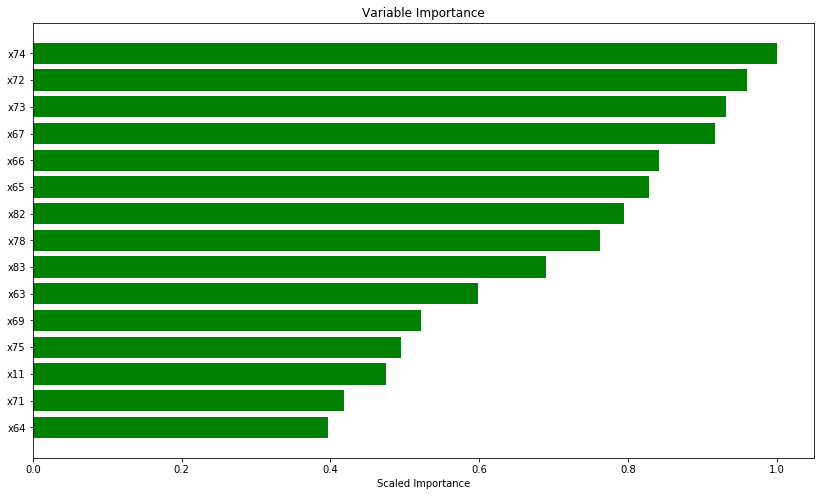

In [15]:
   # plotting the variable importance
    rcParams['figure.figsize'] = 14, 8
    #plt.rcdefaults()
    fig, ax = plt.subplots()

    variables = anomaly_model._model_json['output']['variable_importances']['variable']
    var = variables[0:15]
    y_pos = np.arange(len(var))

    scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
    sc = scaled_importance[0:15]

    ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()

Text(0.5, 0, 'epoch')

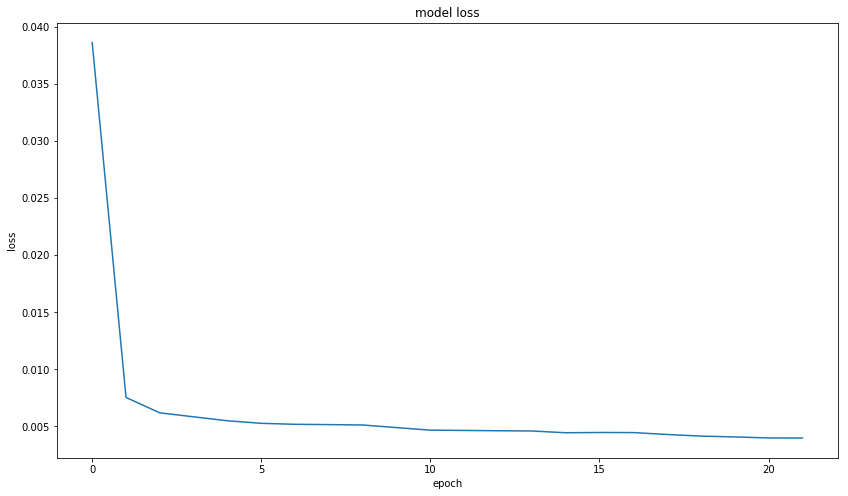

In [16]:


    # plotting the loss
    scoring_history = anomaly_model.score_history()
    %matplotlib inline
    rcParams['figure.figsize'] = 14, 8
    plt.plot(scoring_history['training_mse'])
    #plt.plot(scoring_history['validation_mse'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')




### Evaluating the Testing set

Testing set has both normal and distress datapoints in it. From this training method, The model will learn to identify the pattern of the input data. If an anomalous test point does not match the learned pattern, the autoencoder will likely have a high error rate in reconstructing this data, indicating anomalous data. So that we can identify the anomalies of the data. To calculate the error, it uses Mean Squared Error(MSE)


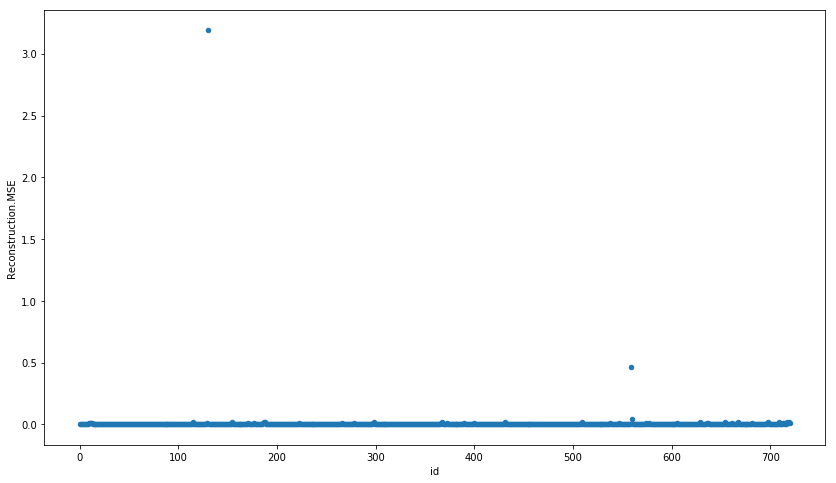

In [17]:
    test_rec_error = anomaly_model.anomaly(test_h2o) 
    # anomaly is a H2O function which calculates the error for the dataset
    test_rec_error_df = test_rec_error.as_data_frame() # converting to pandas dataframe

    # plotting the testing dataset against the error
    test_rec_error_df['id']=test_rec_error_df.index
    rcParams['figure.figsize'] = 14, 8
    test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
    plt.show()



In [18]:
    # predicting the class for the testing dataset
    predictions = anomaly_model.predict(test_h2o)

    error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                            'true_class': Y_test_df})
    error_df.describe()


deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,721.000000,721.000000
mean,0.009093,0.029126
std,0.119889,0.168277
min,0.000659,0.000000
25%,0.002153,0.000000
50%,0.003166,0.000000
75%,0.004586,0.000000
max,3.189225,1.000000


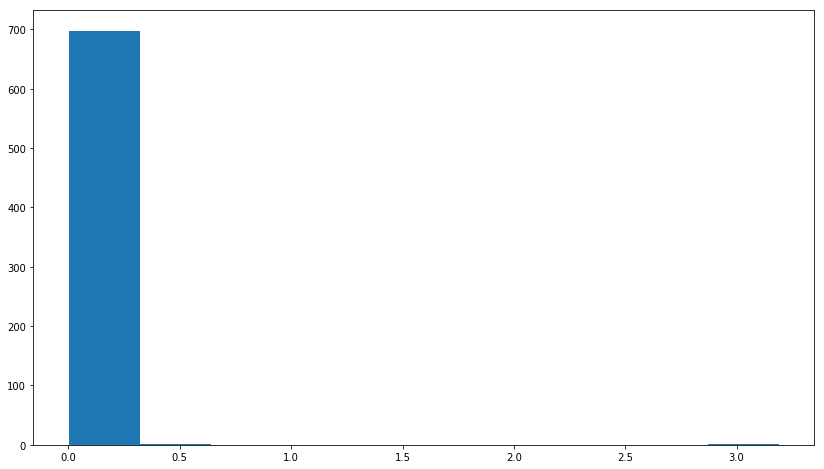

In [19]:
   # reconstruction error for the normal transactions in the testing dataset
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rcParams['figure.figsize'] = 14, 8
    normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
    _ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

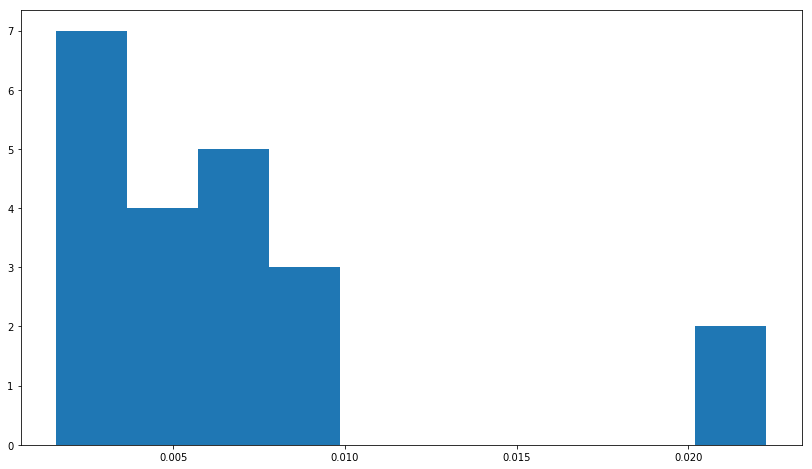

In [20]:
  # reconstruction error for the fraud transactions in the testing dataset
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rcParams['figure.figsize'] = 14, 8
    fraud_error_df = error_df[error_df['true_class'] == 1]
    _ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)




Precision and Recall

Since the data is highly unbalanced, it cannot be measured only by using accuracy. Precision vs Recall was chosen as the matrix for the classification task.

Precision: Measuring the relevancy of obtained results. [ True positives / (True positives + False positives)]

Recall: Measuring how many relevant results are returned. [ True positives / (True positives + False negatives)]

True Positives - Number of actual frauds predicted as frauds

False Positives - Number of non-frauds predicted as frauds

False Negatives - Number of frauds predicted as non-frauds.


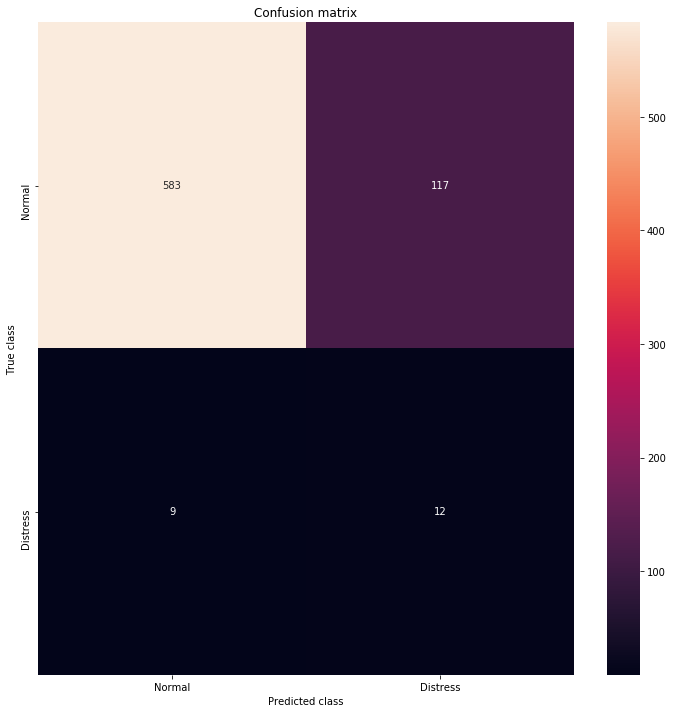

In [37]:
    from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                                 roc_curve, recall_score, classification_report, f1_score,
                                 precision_recall_fscore_support)
    threshold = 0.0055
    import seaborn as sns
    LABELS = ['Normal', 'Distress']
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.true_class, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

## Classification Report

In [38]:
    csr = classification_report(error_df.true_class, y_pred)
    print(csr)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       700
           1       0.09      0.57      0.16        21

   micro avg       0.83      0.83      0.83       721
   macro avg       0.54      0.70      0.53       721
weighted avg       0.96      0.83      0.88       721



## Applying decision tree to find explainability

In [39]:
data.head()

,Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,Financial Distress
0,1,1,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,...,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49,0
1,1,2,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,...,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50,0
2,1,3,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,...,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51,0
3,1,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,...,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52,1
4,2,1,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,...,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27,0


In [40]:
data.columns

Index(['Company', 'Time', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79',
       'x80', 'x81', 'x82', 'x83', 'Financial Distress'],
      dtype='object')

In [41]:
X=data.iloc[:,2:-1]
y=data.iloc[:,-1]

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

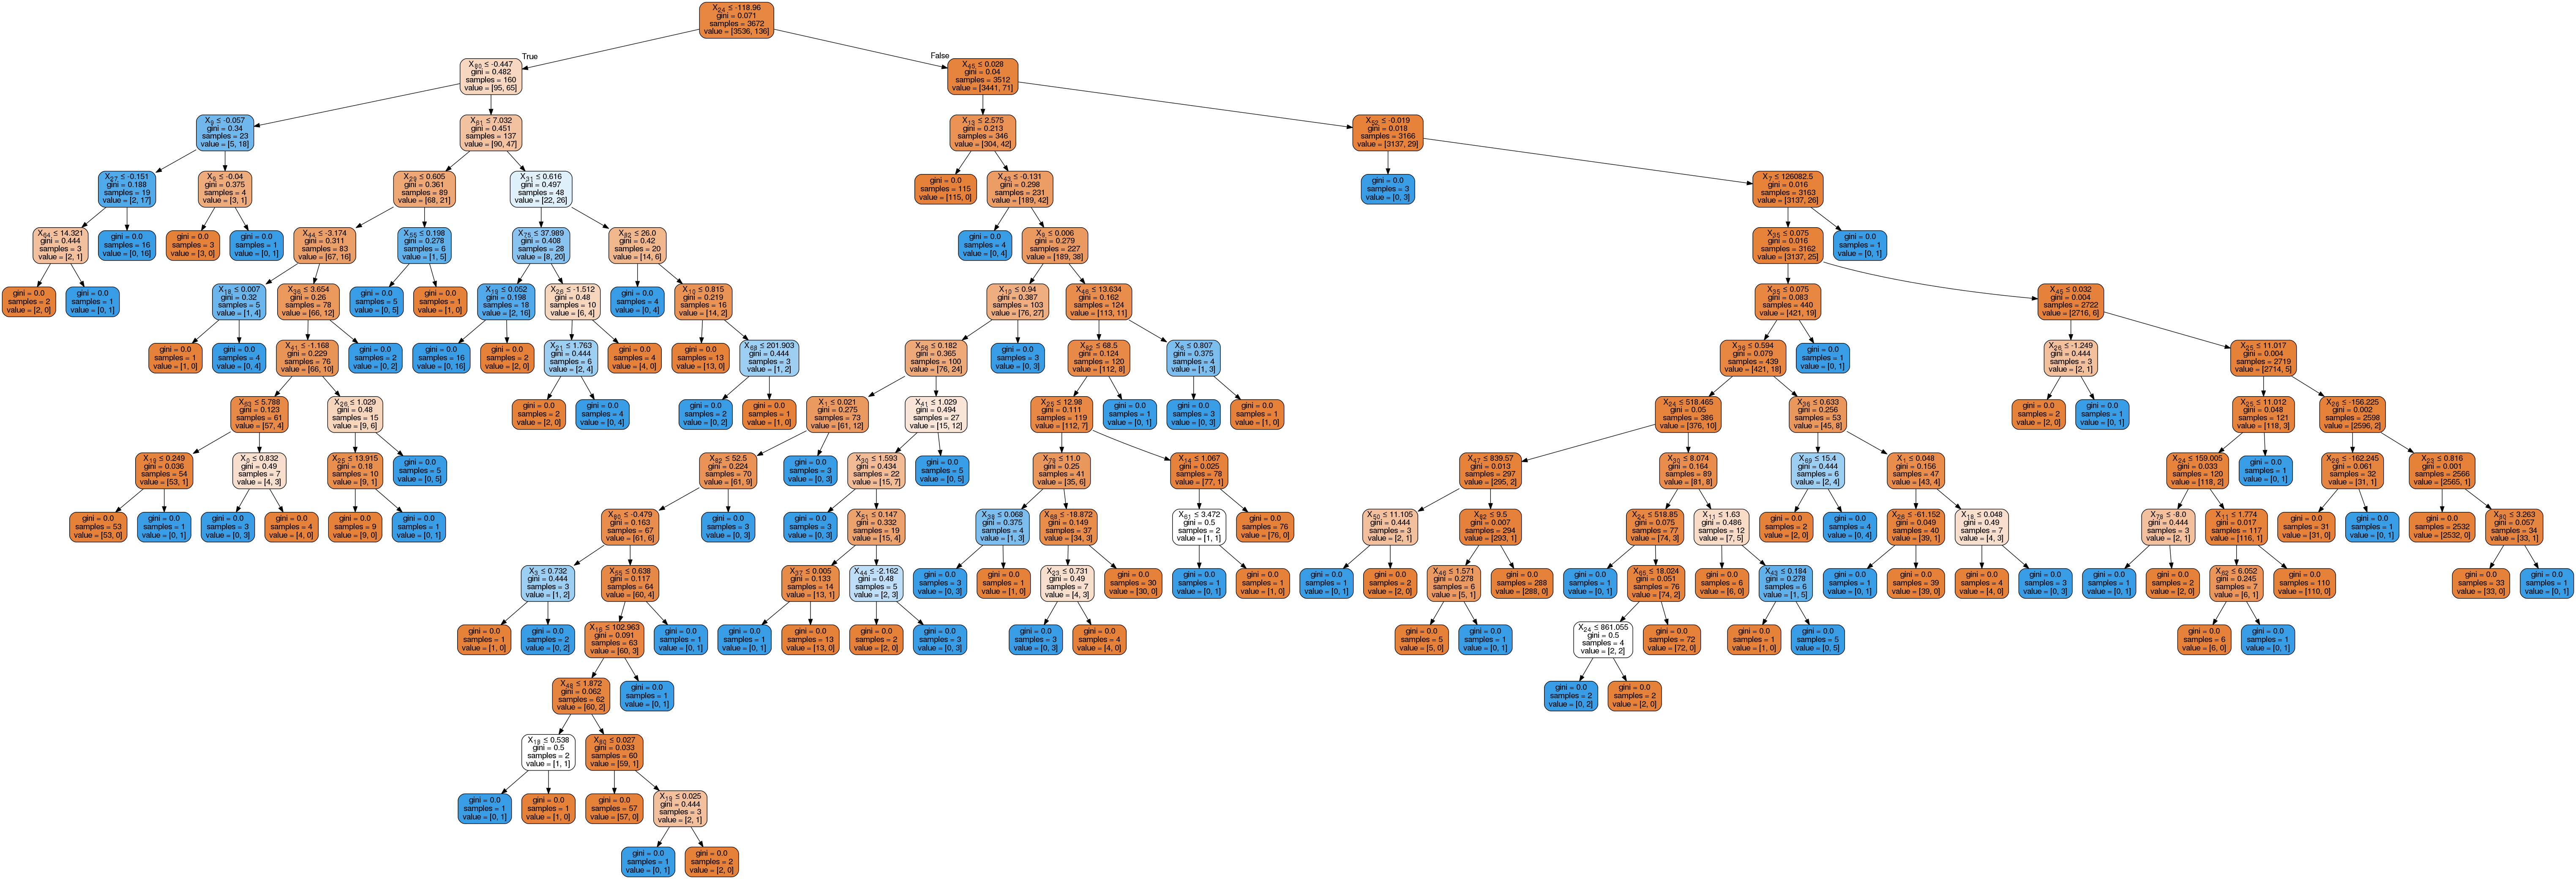

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## How does autoencoder help us in detecting outliers?

From train set we have removed distressed data or points with 1 as target.But in testing set has both normal and distress transactions in it. The Autoencoder will learn to identify the pattern of the input data. If an anomalous test point does not match the learned pattern, the autoencoder will likely have a high error rate in reconstructing this data, indicating anomalous data. So that we can identify the anomalies of the data. To calculate the error, it uses Mean Squared Error(MSE)

### Reference Tutorials

https://hub.packtpub.com/using-autoencoders-for-detecting-credit-card-fraud-tutorial/

https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd